# **Import Google Drive**


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Setting**


In [7]:
from sklearn.isotonic import isotonic_regression
import cvxpy as cp
import numpy as np
import csv, os
from scipy import stats
from sklearn import metrics
import itertools
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statistics
from scipy.stats import levene
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Reinstall LaTeX dependencies to ensure they are properly set up
!apt-get update
!apt-get install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super

# Set the text properties to use LaTeX fonts
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'  # Use serif fonts to match LaTeX's default
plt.rcParams['font.size'] = 28
plt.rcParams['figure.figsize'] = (13,8)  # width, height in inches
plt.rcParams['figure.dpi'] = 300  # dots per inch

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

# **Load CSV file into a pandas DataFrame**


In [ ]:
# Load CSV file into a pandas DataFrame
df = pd.read_csv(r'proxy_score.csv')
df = df.drop_duplicates(['submission_idx', 'author_idx'])

# Load your data from a CSV file
df_review = pd.read_csv('review_daily_anon_2023_0312.csv')
# Extract the first number from the 'rating' column based on the specific format of the rating content
df_review['rating'] = df_review['rating'].str.extract(r'^(\d+)', expand=False).astype(float)
# Extract the first number from the 'confidence' column
df_review['confidence'] = df_review['confidence'].str.extract(r'^(\d+)', expand=False).astype(float)

# **Confidence vs. Variance**

In [9]:
# Record Confidence
final_submission_list = df['submission_id'].unique()

confidence = []
final_submission = []
for i in range(len(final_submission_list)):
  confidences = df_review[df_review['submission_id'] == final_submission_list[i]]['confidence'].tolist()
  confidences = np.array(confidences)
  if np.mean(confidences) >= 3:
    confidence.append( np.mean(confidences) )
    final_submission.append(final_submission_list[i])



# Record Variance
variance = []
for i in range(len(final_submission)):
    variances = df_review[df_review['submission_id'] == final_submission_list[i]]['rating'].tolist()
    variances = np.array(variances)
    # print(variances)
    variance.append( np.var(variances) )



# Compute correlation
correlation_matrix = np.corrcoef(confidence, variance)
correlation = correlation_matrix[0, 1]
print(correlation)

0.020522401856084047


## Plot


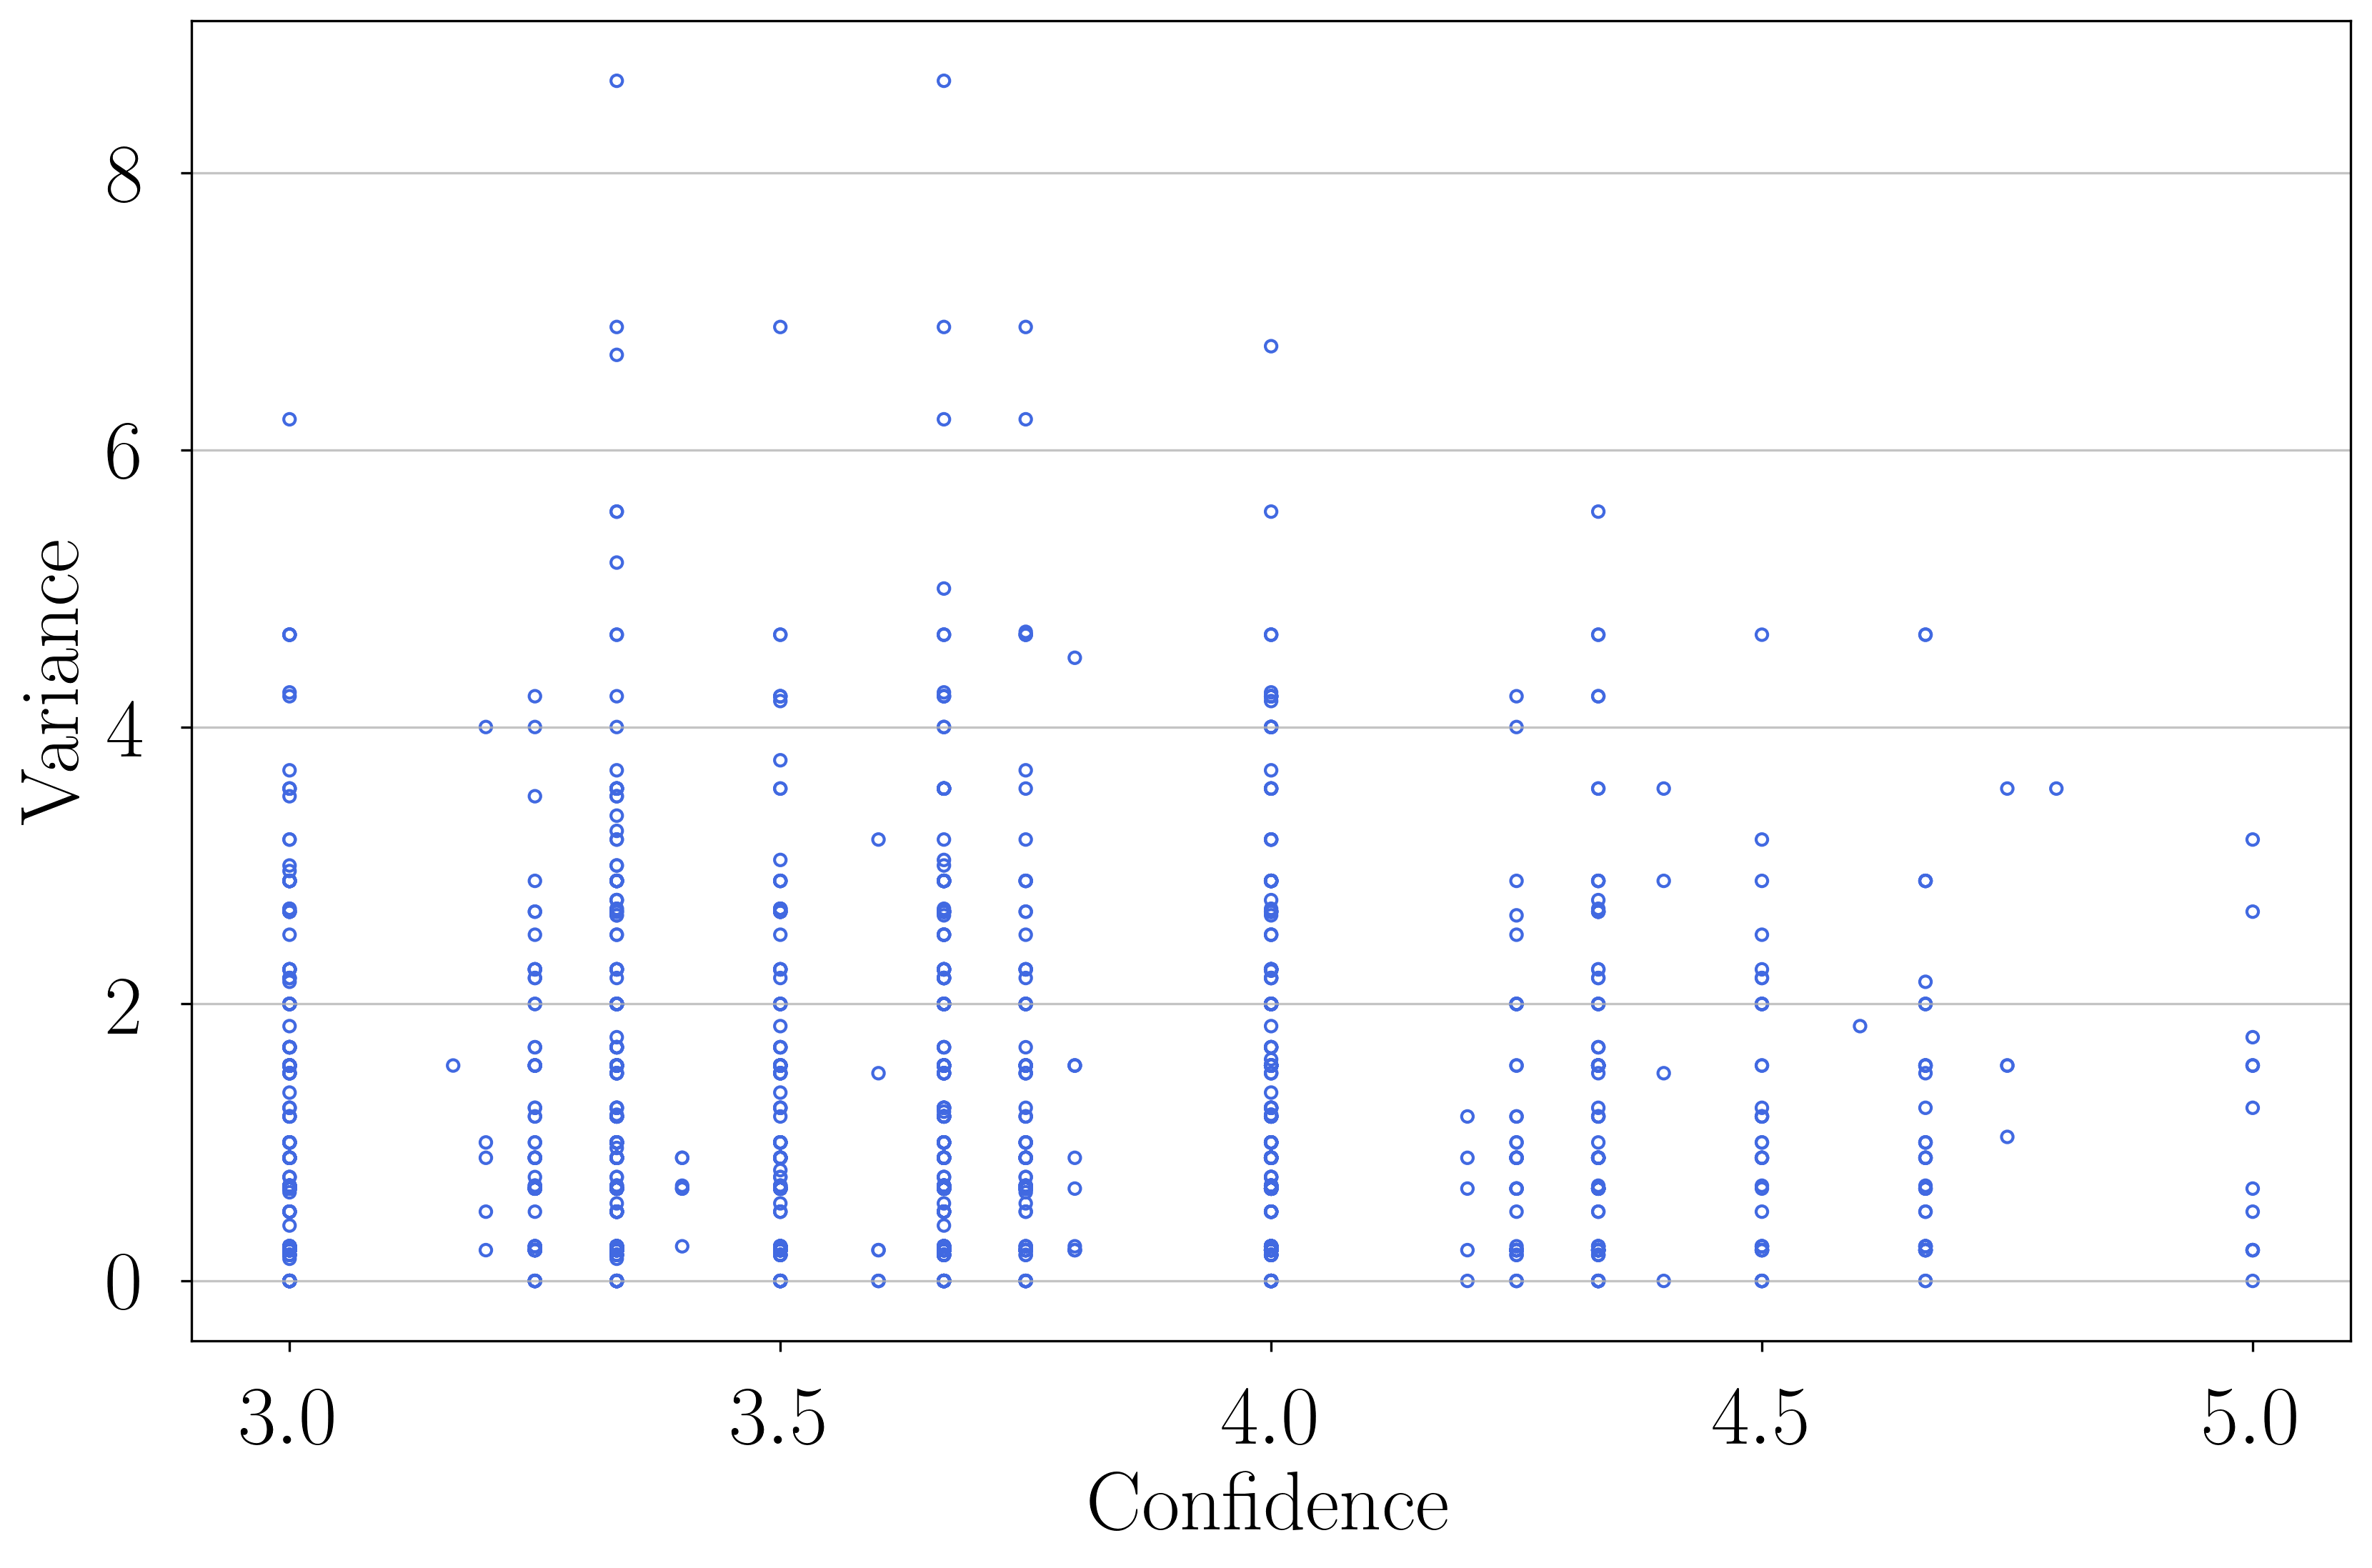

In [ ]:
plt.figure()
# Create a scatter plot for mse_1 with blue color
plt.scatter(confidence, variance, marker='o', s=15, facecolors='none', edgecolors='royalblue')
plt.xlim(2.9, 5.1)
plt.xlabel('Confidence')
plt.ylabel('Variance')
plt.grid(axis='y', alpha=0.75)
plt.gca().tick_params(axis='x', pad=12)
plt.gca().tick_params(axis='y', pad=12)
# plt.title('Variance and Confidence')
plt.savefig("Figures/variance_confidence.pdf", bbox_inches='tight')
plt.show()